# 시계열을 위한 딥러닝

## 다양한 종류의 시계열 작업

## 기온 예측 문제

In [ ]:
!wget https://s3.amazonaws.com/keras-datasets/jena_climate_2009_2016.csv.zip
!unzip jena_climate_2009_2016.csv.zip

--2023-08-06 07:01:18--  https://s3.amazonaws.com/keras-datasets/jena_climate_2009_2016.csv.zip
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.91.134, 52.217.195.136, 54.231.166.208, ...
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.91.134|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13565642 (13M) [application/zip]
Saving to: ‘jena_climate_2009_2016.csv.zip’

jena_climate_2009_2 100%[===================>]  12.94M  41.0MB/s    in 0.3s    

2023-08-06 07:01:19 (41.0 MB/s) - ‘jena_climate_2009_2016.csv.zip’ saved [13565642/13565642]

Archive:  jena_climate_2009_2016.csv.zip
  inflating: jena_climate_2009_2016.csv  
  inflating: __MACOSX/._jena_climate_2009_2016.csv  


In [ ]:
%ls

jena_climate_2009_2016.csv      __MACOSX/
jena_climate_2009_2016.csv.zip  sample_data/


In [ ]:
!head jena_climate_2009_2016.csv

"Date Time","p (mbar)","T (degC)","Tpot (K)","Tdew (degC)","rh (%)","VPmax (mbar)","VPact (mbar)","VPdef (mbar)","sh (g/kg)","H2OC (mmol/mol)","rho (g/m**3)","wv (m/s)","max. wv (m/s)","wd (deg)"
01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.30,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.30
01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.40,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.10
01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.90,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.60
01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.20,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.00
01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.10,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.30
01.01.2009 01:00:00,996.50,-8.05,265.38,-8.78,94.40,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.70
01.01.2009 01:10:00,996.50,-7.62,265.81,-8.30,94.80,3.44,3.26,0.18,2.04,3.27,1305.68,0.18,0.63,166.50
01.01.2009 01:20:00,996.50,-7.62,265.81,-8.36,94.40,3.44,3.25,0.19,2.03,3.26,1305.69,0.19,

**예나 날씨 데이터셋 조사하기**

In [ ]:
import os
fname = os.path.join("jena_climate_2009_2016.csv")

with open(fname) as f:
    data = f.read()

lines = data.split("\n")
header = lines[0].split(",")
lines = lines[1:]
print(header)
print(len(lines))

['"Date Time"', '"p (mbar)"', '"T (degC)"', '"Tpot (K)"', '"Tdew (degC)"', '"rh (%)"', '"VPmax (mbar)"', '"VPact (mbar)"', '"VPdef (mbar)"', '"sh (g/kg)"', '"H2OC (mmol/mol)"', '"rho (g/m**3)"', '"wv (m/s)"', '"max. wv (m/s)"', '"wd (deg)"']
420451


**데이터 파싱**

datatime 정보는 제외하여 raw_data에 담고, 그중 온도는 타겟 y로 별도로 추출하고자 했다.

In [ ]:
import numpy as np
temperature = np.zeros((len(lines),))
raw_data = np.zeros((len(lines), len(header) - 1))
for i, line in enumerate(lines):
    values = [float(x) for x in line.split(",")[1:]]
    temperature[i] = values[1]
    raw_data[i, :] = values[:]

**전체 기온을 그래프로 그리기**

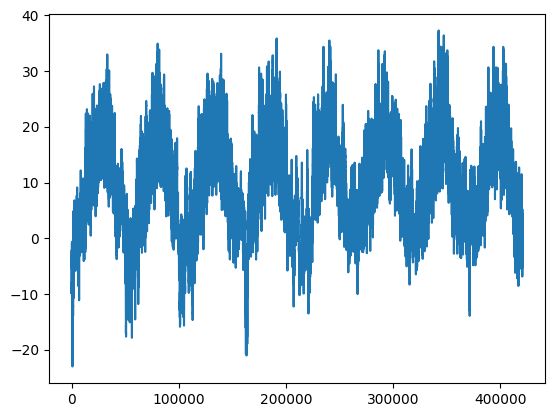

In [ ]:
from matplotlib import pyplot as plt
plt.plot(range(len(temperature)), temperature)
plt.show()

**처음 10일간의 기온을 그래프로 그리기**

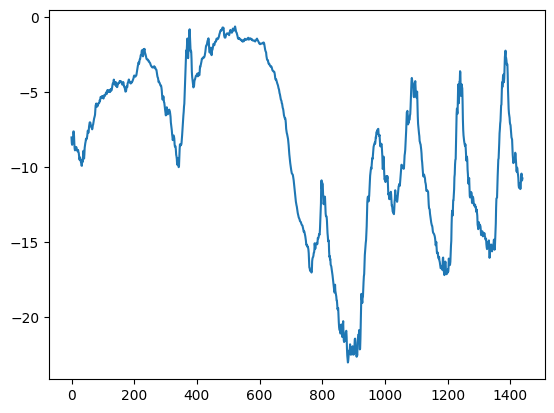

In [ ]:
plt.plot(range(1440), temperature[:1440])
plt.show()

In [ ]:
import pandas as pd
df = pd.read_csv(fname, parse_dates=['Date Time'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420451 entries, 0 to 420450
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Date Time        420451 non-null  datetime64[ns]
 1   p (mbar)         420451 non-null  float64       
 2   T (degC)         420451 non-null  float64       
 3   Tpot (K)         420451 non-null  float64       
 4   Tdew (degC)      420451 non-null  float64       
 5   rh (%)           420451 non-null  float64       
 6   VPmax (mbar)     420451 non-null  float64       
 7   VPact (mbar)     420451 non-null  float64       
 8   VPdef (mbar)     420451 non-null  float64       
 9   sh (g/kg)        420451 non-null  float64       
 10  H2OC (mmol/mol)  420451 non-null  float64       
 11  rho (g/m**3)     420451 non-null  float64       
 12  wv (m/s)         420451 non-null  float64       
 13  max. wv (m/s)    420451 non-null  float64       
 14  wd (deg)         420

<Axes: xlabel='Date Time'>

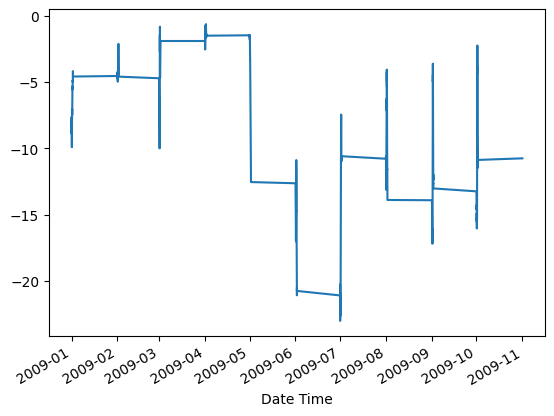

In [ ]:
df[:1440].set_index('Date Time')['T (degC)'].plot()

In [ ]:
cols = df.columns
cols

Index(['Date Time', 'p (mbar)', 'T (degC)', 'Tpot (K)', 'Tdew (degC)',
       'rh (%)', 'VPmax (mbar)', 'VPact (mbar)', 'VPdef (mbar)', 'sh (g/kg)',
       'H2OC (mmol/mol)', 'rho (g/m**3)', 'wv (m/s)', 'max. wv (m/s)',
       'wd (deg)'],
      dtype='object')

<Axes: xlabel='Date Time'>

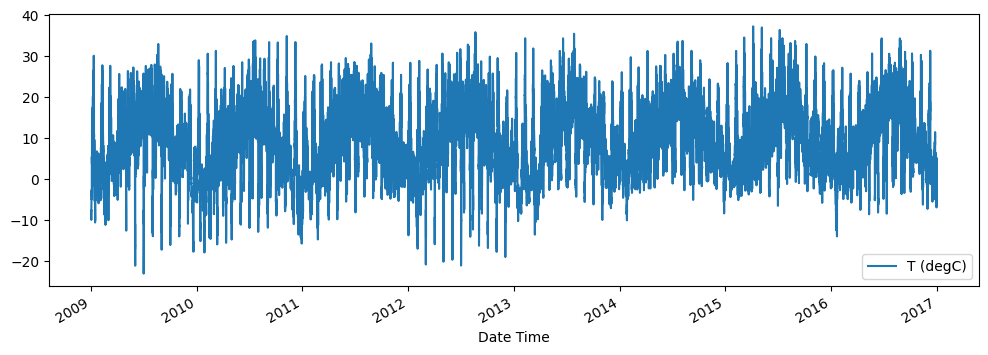

In [ ]:
df.plot.line(cols[0], cols[2], figsize=(12, 4))

**각 분할에 사용할 샘플 수 계산하기**

In [ ]:
num_train_samples = int(0.5 * len(raw_data))
num_val_samples = int(0.25 * len(raw_data))
num_test_samples = len(raw_data) - num_train_samples - num_val_samples
print("num_train_samples:", num_train_samples)
print("num_val_samples:", num_val_samples)
print("num_test_samples:", num_test_samples)
print("all_samples:", num_train_samples+num_val_samples+num_test_samples)

num_train_samples: 210225
num_val_samples: 105112
num_test_samples: 105114
all_samples: 420451


10분 간격의 날씨데이터

In [ ]:
df.head(10)

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,2009-01-01 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,2009-01-01 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,2009-01-01 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,2009-01-01 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,2009-01-01 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3
5,2009-01-01 01:00:00,996.50,-8.05,265.38,-8.78,94.4,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
6,2009-01-01 01:10:00,996.50,-7.62,265.81,-8.30,94.8,3.44,3.26,0.18,2.04,3.27,1305.68,0.18,0.63,166.5
7,2009-01-01 01:20:00,996.50,-7.62,265.81,-8.36,94.4,3.44,3.25,0.19,2.03,3.26,1305.69,0.19,0.50,118.6
8,2009-01-01 01:30:00,996.50,-7.91,265.52,-8.73,93.8,3.36,3.15,0.21,1.97,3.16,1307.17,0.28,0.75,188.5
9,2009-01-01 01:40:00,996.53,-8.43,264.99,-9.34,93.1,3.23,3.00,0.22,1.88,3.02,1309.85,0.59,0.88,185.0


### 데이터 준비

**데이터 정규화**
- raw_data 만 train data의 mean와 std로 표준화를 수행하고
- target인 temperature는 정규화를 수행하지 않았다.


In [ ]:
mean = raw_data[:num_train_samples].mean(axis=0)
raw_data -= mean
std = raw_data[:num_train_samples].std(axis=0)
raw_data /= std

timeseries_dataset_from_array:
- data: 입력 X로서 과거의 정보
- targets: 타겟 y로서 예측할 값들. sequence_length 이상의 값으로 시작해야 함
- sequence_length: 과거 몇 개의 데이터를 사용할 지를 결정
- batch_size: 배치 사이즈

In [ ]:
import numpy as np
from tensorflow import keras
int_sequence = np.arange(10)
dummy_dataset = keras.utils.timeseries_dataset_from_array(
    data=int_sequence[:-1],
    targets=int_sequence[3:],
    # targets=int_sequence[4:],
    sequence_length=3,
    batch_size=2,
)

for inputs, targets in dummy_dataset:
    print("------------------")
    for i in range(inputs.shape[0]):
        print([int(x) for x in inputs[i]], int(targets[i]))

------------------
[0, 1, 2] 4
[1, 2, 3] 5
------------------
[2, 3, 4] 6
[3, 4, 5] 7
------------------
[4, 5, 6] 8
[5, 6, 7] 9


In [ ]:
inputs.shape, targets.shape

(TensorShape([2, 3]), TensorShape([2]))

**훈련, 검증, 테스트 데이터셋 만들기**
- 1시간 간격의 데이터로 예측을 수행
- 과거 5일 간의 1시간 간격의 데이터로 미래 24시간 후의 온도를 예측
- 데이터를 6개 마다 1개의 데이터를 추출해야 한다.

In [ ]:
sampling_rate = 6      # 1시간 간격의 데이터를 추출
sequence_length = 120  # 5 * 24 : 5일간의 과거 데이터의 수

# sequenc_lenth: 과거의 시간 수, 24: 오늘의 시간 수
delay = sampling_rate * (sequence_length + 24 - 1)
batch_size = 256

train_dataset = keras.utils.timeseries_dataset_from_array(
    data=raw_data[:-delay],
    targets=temperature[delay:],
    sampling_rate=sampling_rate,
    sequence_length=sequence_length,
    shuffle=True,
    batch_size=batch_size,
    start_index=0,
    end_index=num_train_samples)

val_dataset = keras.utils.timeseries_dataset_from_array(
    raw_data[:-delay],
    targets=temperature[delay:],
    sampling_rate=sampling_rate,
    sequence_length=sequence_length,
    shuffle=True,
    batch_size=batch_size,
    start_index=num_train_samples,
    end_index=num_train_samples + num_val_samples)

test_dataset = keras.utils.timeseries_dataset_from_array(
    raw_data[:-delay],
    targets=temperature[delay:],
    sampling_rate=sampling_rate,
    sequence_length=sequence_length,
    shuffle=True,
    batch_size=batch_size,
    start_index=num_train_samples + num_val_samples)

**훈련 데이터셋의 배치 크기 확인하기**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420451 entries, 0 to 420450
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Date Time        420451 non-null  datetime64[ns]
 1   p (mbar)         420451 non-null  float64       
 2   T (degC)         420451 non-null  float64       
 3   Tpot (K)         420451 non-null  float64       
 4   Tdew (degC)      420451 non-null  float64       
 5   rh (%)           420451 non-null  float64       
 6   VPmax (mbar)     420451 non-null  float64       
 7   VPact (mbar)     420451 non-null  float64       
 8   VPdef (mbar)     420451 non-null  float64       
 9   sh (g/kg)        420451 non-null  float64       
 10  H2OC (mmol/mol)  420451 non-null  float64       
 11  rho (g/m**3)     420451 non-null  float64       
 12  wv (m/s)         420451 non-null  float64       
 13  max. wv (m/s)    420451 non-null  float64       
 14  wd (deg)         420

120개의 과거 날씨 데이터(14개의 성분) X로 24시간 후의 온도 y를 예측하는 데이터가 256개의 배치로 구성되어 있다.

In [ ]:
for samples, targets in train_dataset:
    print("샘플 크기:", samples.shape)
    print("타깃 크기:", targets.shape)
    break

샘플 크기: (256, 120, 14)
타깃 크기: (256,)


### 상식 수준의 기준점

**상식적인 기준 모델의 MAE 계산하기**

오늘 이시간의 온도로 내일 이시간의 온도를 예측하는 상식적인 모델의 MAE를 계산한다.

In [ ]:
# train temperature's std, mean
std, mean

(array([ 8.50510865,  8.77098361,  8.86560463,  7.08011256, 16.62877917,
         7.6012955 ,  4.14689697,  4.76961017,  2.63277288,  4.1996886 ,
        42.0392747 ,  1.53358803,  2.32305586, 85.85032063]),
 array([ 988.74929466,    8.82590329,  282.9050718 ,    4.31331863,
          75.87275476,   13.14569946,    9.19414209,    3.95148184,
           5.81050741,    9.30208943, 1218.45204015,    2.14977462,
           3.56048029,  176.4405232 ]))

In [ ]:
def evaluate_naive_method(dataset):
    total_abs_err = 0.
    samples_seen = 0
    for samples, targets in dataset:
        # samples.shape = (batch, seq, colum_size)
        # 정규화된 오늘의 온도를 원래 온도 스케일로 변경한 것을 예측값으로 지정
        preds = samples[:, -1, 1] * std[1] + mean[1]
        total_abs_err += np.sum(np.abs(preds - targets))
        samples_seen += samples.shape[0]
    return total_abs_err / samples_seen # mae

print(f"검증 MAE: {evaluate_naive_method(val_dataset):.2f}")
print(f"테스트 MAE: {evaluate_naive_method(test_dataset):.2f}")

검증 MAE: 2.44
테스트 MAE: 2.62


### 기본적인 머신 러닝 모델 시도해 보기

**밀집 연결 모델 훈련하고 평가하기**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(sequence_length, raw_data.shape[-1]))
x = layers.Flatten()(inputs)
x = layers.Dense(16, activation="relu")(x)
outputs = layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

callbacks = [
    keras.callbacks.ModelCheckpoint("jena_dense.keras",
                                    save_best_only=True)
]
model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
history = model.fit(train_dataset,
                    epochs=10,
                    validation_data=val_dataset,
                    callbacks=callbacks)

model = keras.models.load_model("jena_dense.keras")
print(f"테스트 MAE: {model.evaluate(test_dataset)[1]:.2f}")

Epoch 1/10
819/819 [==============================] - 47s 50ms/step - loss: 12.2770 - mae: 2.7098 - val_loss: 10.6731 - val_mae: 2.5731
Epoch 2/10
819/819 [==============================] - 40s 48ms/step - loss: 8.9223 - mae: 2.3481 - val_loss: 9.8961 - val_mae: 2.4859
Epoch 3/10
819/819 [==============================] - 49s 59ms/step - loss: 8.1402 - mae: 2.2422 - val_loss: 10.1848 - val_mae: 2.5170
Epoch 4/10
819/819 [==============================] - 49s 59ms/step - loss: 7.6714 - mae: 2.1796 - val_loss: 10.0173 - val_mae: 2.4968
Epoch 5/10
819/819 [==============================] - 48s 58ms/step - loss: 7.3960 - mae: 2.1408 - val_loss: 10.0189 - val_mae: 2.4992
Epoch 6/10
819/819 [==============================] - 39s 48ms/step - loss: 7.1943 - mae: 2.1140 - val_loss: 11.6189 - val_mae: 2.7046
Epoch 7/10
819/819 [==============================] - 48s 59ms/step - loss: 6.9874 - mae: 2.0828 - val_loss: 10.8889 - val_mae: 2.6082
Epoch 8/10
819/819 [==============================] - 4

**결과 그래프 그리기**

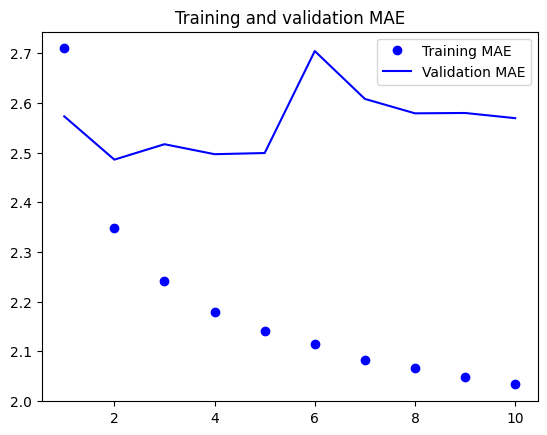

In [ ]:
import matplotlib.pyplot as plt
loss = history.history["mae"]
val_loss = history.history["val_mae"]
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, "bo", label="Training MAE")
plt.plot(epochs, val_loss, "b", label="Validation MAE")
plt.title("Training and validation MAE")
plt.legend()
plt.show()

### 1D 합성곱 모델 시도해 보기
케라스에서 1D 컨브넷은 `Conv1D` 층을 사용하여 구현합니다. `Conv1D`는 `Conv2D`와 인터페이스가 비슷합니다.
- `(batch, time, features)` 크기의 3D 텐서를 입력받고
- features 채널을 갖는 1d filter를 time을 따라 이동하면서,
- 새로운 `(batch, t-f+1)` 개의 activation map을 생성하고
- n_filter 개의 필터를 사용하면 `(batch, t-f+1, n_filter)` 의 3D 텐서를 반환합니다.

합성곱 윈도우는 시간 축의 1D 윈도우입니다. 즉, 입력 텐서의 두 번째 축입니다.
![](https://i.imgur.com/euMTXVU.png)

In [ ]:
inputs = keras.Input(shape=(sequence_length, raw_data.shape[-1]))
x = layers.Conv1D(8, 24, activation="relu")(inputs)
x = layers.MaxPooling1D(2)(x)
x = layers.Conv1D(8, 12, activation="relu")(x)
x = layers.MaxPooling1D(2)(x)
x = layers.Conv1D(8, 6, activation="relu")(x)
x = layers.GlobalAveragePooling1D()(x)
outputs = layers.Dense(1)(x)
model = keras.Model(inputs, outputs)
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 120, 14)]         0         
                                                                 
 conv1d (Conv1D)             (None, 97, 8)             2696      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 48, 8)            0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 37, 8)             776       
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 18, 8)            0         
 1D)                                                             
                                                                 
 conv1d_2 (Conv1D)           (None, 13, 8)             392 

- padding = 'valid' : 5일전 0시 데이터와 오늘 23시 데이터가 한번씩만 사용된다.
    - 가장 중요한 오늘 23시 데이터의 활용도가 떨어져서 좋은 결과를 얻기 힘들다.
- filter size = 24 : 24시간의 데이터로부터 1시간의 출력을 생성한다.
    - 너무 긴 시간에 걸쳐 1시간의 데이터를 추출하므로 정보가 뭉그러진다.
- average pooling: 5일전, 4일전, 3일전, 2일전, 1일전의 날씨들에 대한 내일 온도의 기여도가 똑같다.
    - 오늘 이시간의 기여도가 더 크도록 해줘야 한다.

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint("jena_conv.keras",
                                    save_best_only=True)
]
model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
history = model.fit(train_dataset,
                    epochs=10,
                    validation_data=val_dataset,
                    callbacks=callbacks)

model = keras.models.load_model("jena_conv.keras")
print(f"테스트 MAE: {model.evaluate(test_dataset)[1]:.2f}")

Epoch 1/10
819/819 [==============================] - 49s 52ms/step - loss: 23.4527 - mae: 3.7841 - val_loss: 15.8530 - val_mae: 3.1314
Epoch 2/10
819/819 [==============================] - 48s 59ms/step - loss: 15.6034 - mae: 3.1321 - val_loss: 14.3089 - val_mae: 2.9751
Epoch 3/10
819/819 [==============================] - 49s 59ms/step - loss: 14.4013 - mae: 3.0039 - val_loss: 13.9555 - val_mae: 2.9311
Epoch 4/10
819/819 [==============================] - 49s 60ms/step - loss: 13.5426 - mae: 2.9131 - val_loss: 18.3328 - val_mae: 3.4154
Epoch 5/10
819/819 [==============================] - 40s 49ms/step - loss: 12.9036 - mae: 2.8421 - val_loss: 15.1096 - val_mae: 3.0893
Epoch 6/10
819/819 [==============================] - 41s 50ms/step - loss: 12.4002 - mae: 2.7859 - val_loss: 14.4048 - val_mae: 3.0128
Epoch 7/10
819/819 [==============================] - 41s 49ms/step - loss: 11.9895 - mae: 2.7393 - val_loss: 14.0234 - val_mae: 2.9287
Epoch 8/10
819/819 [============================

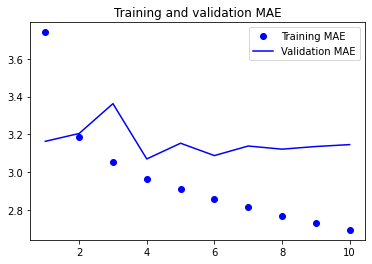

In [ ]:
loss = history.history["mae"]
val_loss = history.history["val_mae"]
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, "bo", label="Training MAE")
plt.plot(epochs, val_loss, "b", label="Validation MAE")
plt.title("Training and validation MAE")
plt.legend()
plt.show()

### 첫 번째 순환 신경망

**간단한 LSTM 기반 모델**

In [ ]:
inputs = keras.Input(shape=(sequence_length, raw_data.shape[-1]))
x = layers.LSTM(16)(inputs)
outputs = layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

callbacks = [
    keras.callbacks.ModelCheckpoint("jena_lstm.keras",
                                    save_best_only=True)
]
model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
history = model.fit(train_dataset,
                    epochs=10,
                    validation_data=val_dataset,
                    callbacks=callbacks)

model = keras.models.load_model("jena_lstm.keras")
print(f"테스트 MAE: {model.evaluate(test_dataset)[1]:.2f}")

Epoch 1/10
819/819 [==============================] - 48s 54ms/step - loss: 37.8973 - mae: 4.4767 - val_loss: 11.8109 - val_mae: 2.6254
Epoch 2/10
819/819 [==============================] - 51s 62ms/step - loss: 10.6637 - mae: 2.5297 - val_loss: 9.3364 - val_mae: 2.3759
Epoch 3/10
819/819 [==============================] - 43s 53ms/step - loss: 9.4706 - mae: 2.3927 - val_loss: 9.1754 - val_mae: 2.3606
Epoch 4/10
819/819 [==============================] - 50s 61ms/step - loss: 8.9480 - mae: 2.3270 - val_loss: 9.4116 - val_mae: 2.3844
Epoch 5/10
819/819 [==============================] - 51s 62ms/step - loss: 8.6203 - mae: 2.2850 - val_loss: 9.5343 - val_mae: 2.4149
Epoch 6/10
819/819 [==============================] - 51s 62ms/step - loss: 8.3570 - mae: 2.2520 - val_loss: 9.5921 - val_mae: 2.4285
Epoch 7/10
819/819 [==============================] - 51s 61ms/step - loss: 8.1224 - mae: 2.2228 - val_loss: 9.7248 - val_mae: 2.4366
Epoch 8/10
819/819 [==============================] - 43s 5

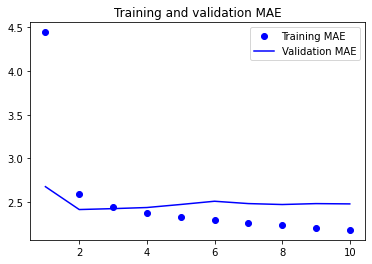

In [ ]:
loss = history.history["mae"]
val_loss = history.history["val_mae"]
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, "bo", label="Training MAE")
plt.plot(epochs, val_loss, "b", label="Validation MAE")
plt.title("Training and validation MAE")
plt.legend()
plt.show()

## 순환 신경망 이해하기

**넘파이로 구현한 간단한 RNN**

SimpleRNN layer

In [ ]:
import numpy as np
timesteps = 100
input_features = 32
output_features = 64
inputs = np.random.random((timesteps, input_features))
state_t = np.zeros((output_features,))
W = np.random.random((output_features, input_features))
U = np.random.random((output_features, output_features))
b = np.random.random((output_features,))
successive_outputs = []
for input_t in inputs:
    output_t = np.tanh(np.dot(W, input_t) + np.dot(U, state_t) + b)
    successive_outputs.append(output_t)
    state_t = output_t
final_output_sequence = np.stack(successive_outputs, axis=0)

### 케라스의 순환 층

**어떤 길이의 시퀀스도 처리할 수 있는 RNN 층**

In [ ]:
num_features = 32
inputs = keras.Input(shape=(None, num_features))
outputs = layers.SimpleRNN(64)(inputs)

**마지막 출력 스텝만 반환하는 RNN 층**



In [ ]:
num_features = 32
steps = 120
inputs = keras.Input(shape=(steps, num_features))
outputs = layers.SimpleRNN(64, return_sequences=False)(inputs)
print(outputs.shape)

(None, 64)


**전체 출력 시퀀스를 반환하는 RNN 층**

In [ ]:
num_features = 32
steps = 120
inputs = keras.Input(shape=(steps, num_features))
outputs = layers.SimpleRNN(64, return_sequences=True)(inputs)
print(outputs.shape)

(None, 120, 64)


**스태킹(stacking) RNN 층**

In [ ]:
inputs = keras.Input(shape=(steps, num_features))
x = layers.SimpleRNN(16, return_sequences=True)(inputs)
x = layers.SimpleRNN(16, return_sequences=True)(x)
outputs = layers.SimpleRNN(16)(x)

## 순환 신경망의 고급 사용법

### 과대적합을 감소하기 위해 순환 드롭아웃 사용하기

**드롭아웃 규제를 적용한 LSTM 모델 훈련하고 평가하기**

In [ ]:
from tensorflow import keras
from keras import layers

inputs = keras.Input(shape=(sequence_length, raw_data.shape[-1]))
x = layers.LSTM(32, recurrent_dropout=0.25, )(inputs)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

callbacks = [
    keras.callbacks.ModelCheckpoint("jena_lstm_dropout.keras",
                                    save_best_only=True)
]
model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
history = model.fit(train_dataset,
                    epochs=50,
                    validation_data=val_dataset,
                    callbacks=callbacks)

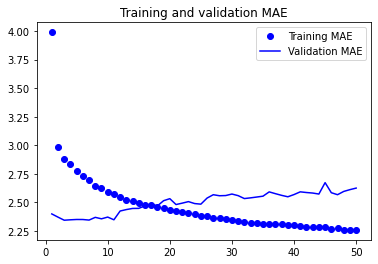

In [ ]:
loss = history.history["mae"]
val_loss = history.history["val_mae"]
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, "bo", label="Training MAE")
plt.plot(epochs, val_loss, "b", label="Validation MAE")
plt.title("Training and validation MAE")
plt.legend()
plt.show()

unroll: time series hidden operation을 for 문을 통해 반복하여 계산할 지 여부를 지정
- unroll = False : 반복적으로 h를 계산하여, 메모리를 절약
    - 다만 h를 출력하기 때문에, 메모리에 쓰기 위해 GPU -> RAM 간 데이터 이동 발생
    - 이로 인해 CPU로만 처리하는 것에 비해 더 느려질 수 있음
    - 대규모 RNN을 사용할 때만 빨라짐
- unroll = True: 반복적으로 h를 계산하지 않고, sequencial하게 한번에 연산을 수행
    - 약간의 속도를 빠르게할 수 있으나
    - 최종 h를 계산하기 전까지 중간 시점의(intermediate) h를 계속 간직하고 있어야 하므로 메모리 소모량이 많음
    - sequence_length 정보가 모델에 알려져 있어야 지정이 가능하고
    - sequence_length가 긴 경우, 충분한 메모리가 있지 않으면 연산 실패가 발생할 수 있다.

In [ ]:
inputs = keras.Input(shape=(sequence_length, num_features))
x = layers.LSTM(32, recurrent_dropout=0.2, unroll=True)(inputs)

### 스태킹 순환 층

**드롭아웃 규제와 스태킹을 적용한 GRU 모델을 훈련하고 평가하기**

In [ ]:
inputs = keras.Input(shape=(sequence_length, raw_data.shape[-1]))
x = layers.GRU(32, recurrent_dropout=0.5, return_sequences=True)(inputs)
x = layers.GRU(32, recurrent_dropout=0.5)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

callbacks = [
    keras.callbacks.ModelCheckpoint("jena_stacked_gru_dropout.keras",
                                    save_best_only=True)
]
model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
history = model.fit(train_dataset,
                    epochs=50,
                    validation_data=val_dataset,
                    callbacks=callbacks)
model = keras.models.load_model("jena_stacked_gru_dropout.keras")
print(f"테스트 MAE: {model.evaluate(test_dataset)[1]:.2f}")

Epoch 1/50
819/819 [==============================] - 170s 203ms/step - loss: 24.9674 - mae: 3.6971 - val_loss: 9.3819 - val_mae: 2.3663
Epoch 2/50
819/819 [==============================] - 166s 202ms/step - loss: 14.0600 - mae: 2.9063 - val_loss: 8.8450 - val_mae: 2.3052
Epoch 3/50
819/819 [==============================] - 164s 201ms/step - loss: 13.2497 - mae: 2.8217 - val_loss: 10.0125 - val_mae: 2.4683
Epoch 4/50
819/819 [==============================] - 165s 201ms/step - loss: 12.7315 - mae: 2.7663 - val_loss: 9.2354 - val_mae: 2.3644
Epoch 5/50
819/819 [==============================] - 163s 199ms/step - loss: 12.1807 - mae: 2.7101 - val_loss: 9.1407 - val_mae: 2.3705
Epoch 6/50
819/819 [==============================] - 161s 196ms/step - loss: 11.7747 - mae: 2.6619 - val_loss: 9.2574 - val_mae: 2.3707
Epoch 7/50
819/819 [==============================] - 160s 196ms/step - loss: 11.3961 - mae: 2.6199 - val_loss: 10.0435 - val_mae: 2.4651
Epoch 8/50
819/819 [===================

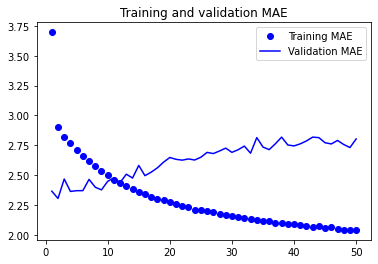

In [ ]:
loss = history.history["mae"]
val_loss = history.history["val_mae"]
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, "bo", label="Training MAE")
plt.plot(epochs, val_loss, "b", label="Validation MAE")
plt.title("Training and validation MAE")
plt.legend()
plt.show()

### 양방향 RNN 사용하기
![](https://velog.velcdn.com/images%2Fpeterpictor%2Fpost%2F68f9d9c5-e532-4b99-bb21-1e1a26b041b7%2F%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202021-07-08%20%E1%84%8B%E1%85%A9%E1%84%92%E1%85%AE%2010.29.13.png)

시퀀스를 거꾸로 뒤집어 LSTM 모델 훈련하기 (책에는 없음)

In [ ]:
def train_generator():
    while True:
        for samples, targets in train_dataset:
            yield samples[:, ::-1, :], targets

def val_generator():
    while True:
        for samples, targets in val_dataset:
            yield samples[:, ::-1, :], targets

train_gen = train_generator()
val_gen = val_generator()

In [ ]:
inputs = keras.Input(shape=(sequence_length, raw_data.shape[-1]))
x = layers.LSTM(32, recurrent_dropout=0.25)(inputs)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
history = model.fit(train_gen,
                    epochs=10,
                    steps_per_epoch=819,
                    validation_data=val_gen,
                    validation_steps=410)

Epoch 1/10
819/819 [==============================] - 101s 121ms/step - loss: 36.9006 - mae: 4.6410 - val_loss: 18.9652 - val_mae: 3.4294
Epoch 2/10
819/819 [==============================] - 99s 121ms/step - loss: 22.6383 - mae: 3.7189 - val_loss: 18.2825 - val_mae: 3.3540
Epoch 3/10
819/819 [==============================] - 99s 121ms/step - loss: 20.8031 - mae: 3.5519 - val_loss: 16.8480 - val_mae: 3.2190
Epoch 4/10
819/819 [==============================] - 100s 122ms/step - loss: 19.5874 - mae: 3.4360 - val_loss: 16.1057 - val_mae: 3.1116
Epoch 5/10
819/819 [==============================] - 100s 122ms/step - loss: 18.6322 - mae: 3.3508 - val_loss: 15.6007 - val_mae: 3.0650
Epoch 6/10
819/819 [==============================] - 100s 122ms/step - loss: 17.1515 - mae: 3.2061 - val_loss: 13.7223 - val_mae: 2.8709
Epoch 7/10
819/819 [==============================] - 101s 123ms/step - loss: 14.8527 - mae: 2.9918 - val_loss: 11.0055 - val_mae: 2.5476
Epoch 8/10
819/819 [================

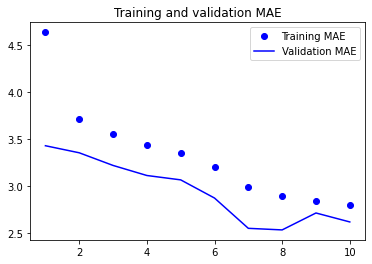

In [ ]:
loss = history.history["mae"]
val_loss = history.history["val_mae"]
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, "bo", label="Training MAE")
plt.plot(epochs, val_loss, "b", label="Validation MAE")
plt.title("Training and validation MAE")
plt.legend()
plt.show()

**양방향 LSTM 모델 훈련하고 평가하기**

In [ ]:
inputs = keras.Input(shape=(sequence_length, raw_data.shape[-1]))
x = layers.Bidirectional(layers.LSTM(16))(inputs)
outputs = layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
history = model.fit(train_dataset,
                    epochs=10,
                    validation_data=val_dataset)

Epoch 1/10
819/819 [==============================] - 70s 81ms/step - loss: 27.5815 - mae: 3.7712 - val_loss: 10.8344 - val_mae: 2.5426
Epoch 2/10
819/819 [==============================] - 67s 81ms/step - loss: 9.5891 - mae: 2.4210 - val_loss: 10.1963 - val_mae: 2.4629
Epoch 3/10
819/819 [==============================] - 67s 82ms/step - loss: 8.5196 - mae: 2.2813 - val_loss: 10.3196 - val_mae: 2.4804
Epoch 4/10
819/819 [==============================] - 67s 82ms/step - loss: 7.8903 - mae: 2.1938 - val_loss: 10.9557 - val_mae: 2.5508
Epoch 5/10
819/819 [==============================] - 67s 81ms/step - loss: 7.4612 - mae: 2.1356 - val_loss: 11.2426 - val_mae: 2.5938
Epoch 6/10
819/819 [==============================] - 67s 81ms/step - loss: 7.1996 - mae: 2.1005 - val_loss: 11.2552 - val_mae: 2.6031
Epoch 7/10
819/819 [==============================] - 67s 82ms/step - loss: 6.9553 - mae: 2.0695 - val_loss: 11.7765 - val_mae: 2.6525
Epoch 8/10
819/819 [==============================] - 

### 더 나아가서

## 요약